In [1]:
from google.colab import files

uploaded= files.upload()

Saving adult_with_headers.csv to adult_with_headers (1).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Exploration and Preprocessing:

In [3]:
# Loading dataset and checking size of the data

df= pd.read_csv("adult_with_headers.csv")
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Checking for missing values

df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
# Checking for duplicates

df[df.duplicated()].shape

(24, 15)

In [7]:
# Data is not exactly same so we cannot drop them

df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
# Checking data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Basic statistics

df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
# Standardization

from sklearn.preprocessing import StandardScaler

ss= StandardScaler()

for i in df.columns:
    if df[i].dtype== 'int64' or df[i].dtype== 'float64':
        df[i] = ss.fit_transform(df[[i]])

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [12]:
# Normalization

from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

for i in df.columns:
  if df[i].dtype== "int64":
    df[i]= scaler.fit_transform(df[[i]])

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


# **Discuss the scenarios where each scaling technique is preferred and why.**

Standardization:

1. Standardization is preferred when the distribution of the features does not follow a normal distribution or has outliers.
2. When you want to standardize features to have a mean of 0 and a standard deviation of 1, making it easier to interpret and compare the importance of different features.
3. It preserves the shape of the original distribution and is less sensitive to outliers compared to min-max scaling.

Normalization:

1. When the features have a known minimum and maximum value.
2. When you want to scale the features to a fixed range, typically between 0 and 1, making it easier to interpret and compare the values across different features.
3. Min-max scaling linearly transforms the data to a fixed range, typically between 0 and 1, by subtracting the minimum value and dividing by the range (maximum value minus minimum value) of each feature.
4. It preserves the relative distances between data points and is easy to understand and implement.


# **2. Encoding Techniques:**

In [14]:
# One-Hot Encoding

categorical_less_than_5 = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() < 5]

df_encoded = pd.get_dummies(df, columns=categorical_less_than_5)

In [15]:
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,0.148453,-0.21666,-0.035429,United-States,0,1,1,0
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,-0.145920,-0.21666,-2.222153,United-States,0,1,1,0
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,-0.145920,-0.21666,-0.035429,United-States,0,1,1,0
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,-0.145920,-0.21666,-0.035429,United-States,0,1,1,0
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,-0.145920,-0.21666,-0.035429,Cuba,1,0,1,0


In [16]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

LE= LabelEncoder()

for i in df.columns:
  if df[i].dtype== "object" and df[i].nunique() >5 :
    df[i]= LE.fit_transform(df[i])

In [17]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,7,-1.063611,9,1.134739,4,1,1,White,Male,0.148453,-0.21666,-0.035429,39,<=50K
1,0.837109,6,-1.008707,9,1.134739,2,4,0,White,Male,-0.145920,-0.21666,-2.222153,39,<=50K
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,White,Male,-0.145920,-0.21666,-0.035429,39,<=50K
3,1.057047,4,0.425801,1,-1.197459,2,6,0,Black,Male,-0.145920,-0.21666,-0.035429,39,<=50K
4,-0.775768,4,1.408176,9,1.134739,2,10,5,Black,Female,-0.145920,-0.21666,-0.035429,5,<=50K


# **Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

**One-Hot Encoding:**

Pros:
1. One-hot encoding preserves the relationship between categories by representing each category as a binary vector. This prevents the model from assuming any ordinal relationship between categories.

2. It is particularly useful when dealing with categorical variables with a small number of unique categories, as it does not introduce a high dimensionality problem in such cases.

3. The encoded columns are easy to interpret, as each category is represented by its own binary column with values 0 and 1.

Cons:

1. High Dimensionality: One-hot encoding can lead to a high-dimensional dataset, especially when dealing with categorical variables with a large number of unique categories. This can increase the complexity of the model and slow down computation.

2. Sparse Matrix: The resulting encoded dataset may be sparse, especially if there are many unique categories across multiple categorical variables. Sparse matrices can require more memory and computational resources to store and process.

3. Curse of Dimensionality: One-hot encoding can exacerbate the curse of dimensionality, which can lead to overfitting, especially in datasets with a small number of observations relative to the number of features.

Label Encoding:

Pros:

1. Simplicity: Label encoding is straightforward to implement and requires minimal preprocessing compared to other encoding techniques.
2. Preserves Ordinal Information: Label encoding can be beneficial when there is an inherent ordinal relationship among categories, as it encodes categories with integer labels that reflect their order.

3. Reduced Dimensionality: Label encoding does not introduce additional columns like one-hot encoding does, which can be advantageous when dealing with categorical variables with a large number of unique categories.

Cons:

1. Arbitrary Numerical Assignments: Label encoding assigns numerical labels to categories arbitrarily, which may imply an ordinal relationship that does not exist. This can mislead the model into making incorrect assumptions about the data.
2. Potential Bias: If the numerical labels assigned by label encoding are not representative of the underlying data distribution, it can introduce bias into the model.
3. Loss of Information: Label encoding may lead to a loss of information when categories with different labels are considered similar by the model due to their numerical proximity.

# **3. Feature Engineering:**

In [18]:
# Convert 'income' and 'education_num' columns to numeric data types
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['education_num'] = pd.to_numeric(df['education_num'], errors='coerce')

# Feature 1: Income-to-Education Ratio
df['income_education_ratio'] = df['income'] / df['education_num']

# Feature 2: Work Hours per Education Level
work_hours_per_education = df.groupby('education_num')['hours_per_week'].median()
df['work_hours_per_education'] = df['education_num'].map(work_hours_per_education)


1. Income-to-Education Ratio: This feature could be calculated by dividing the income by the education level. The rationale behind this is that it provides a measure of the individual's income to their level of education. Higher values may indicate that the individual is earning more, which could be because of higher skills or market demand for their profession.

2. Work Hours per Education Level: This feature could involve grouping individuals by their education level and calculating the average or median hours worked per week for each group. The rationale behind this feature is to understand if there's a correlation between education level and the number of hours worked. It could capture trends such as individuals with higher education levels being more likely to work longer hours due to higher-skilled professions or greater career responsibilities.

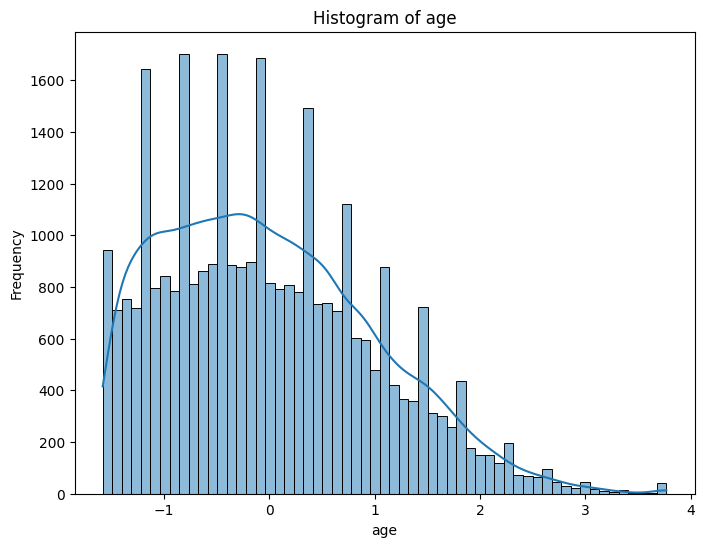

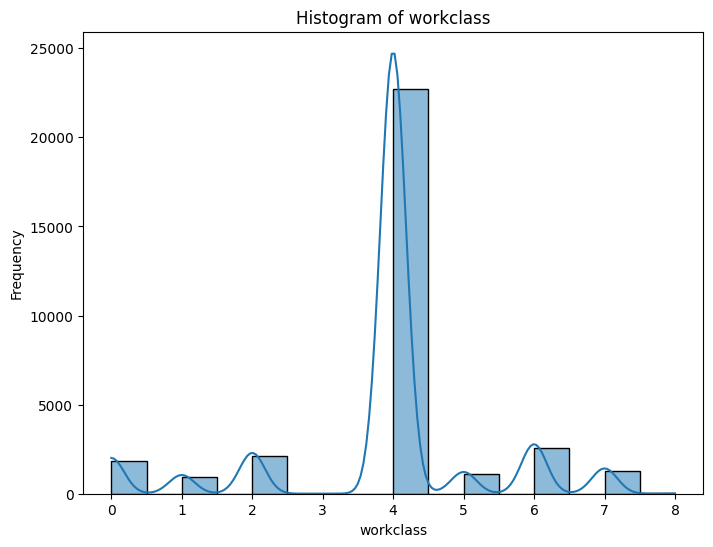

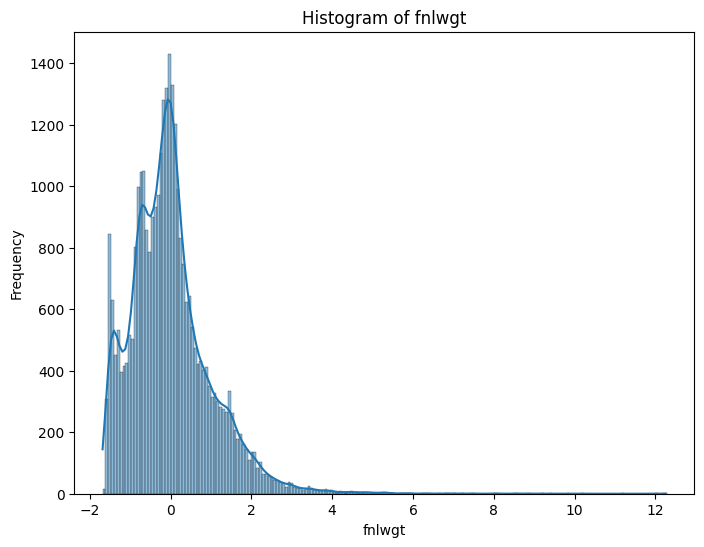

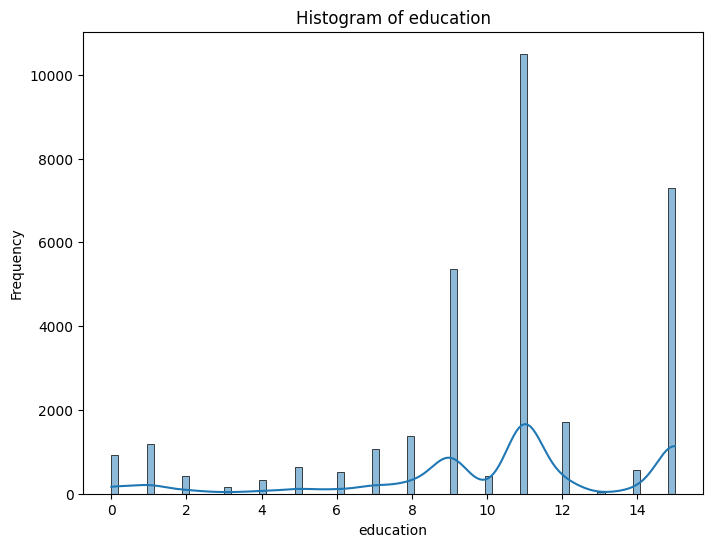

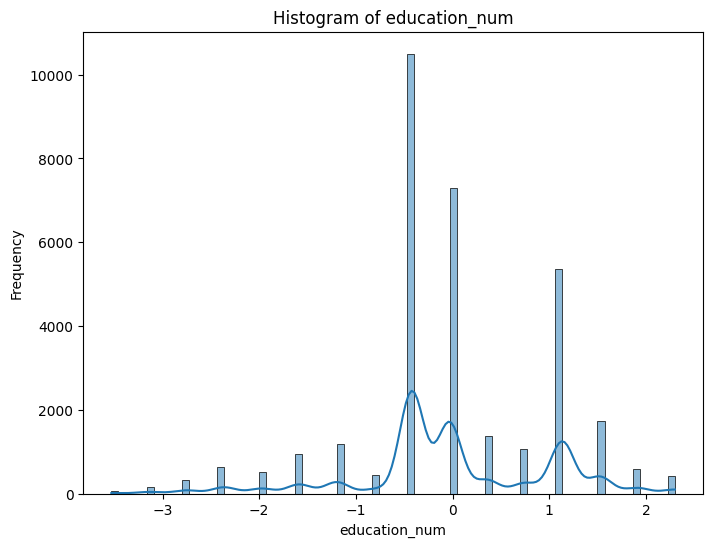

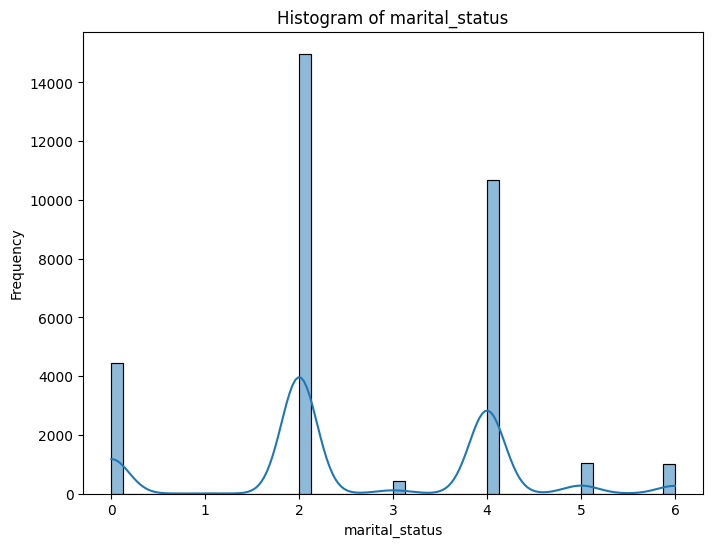

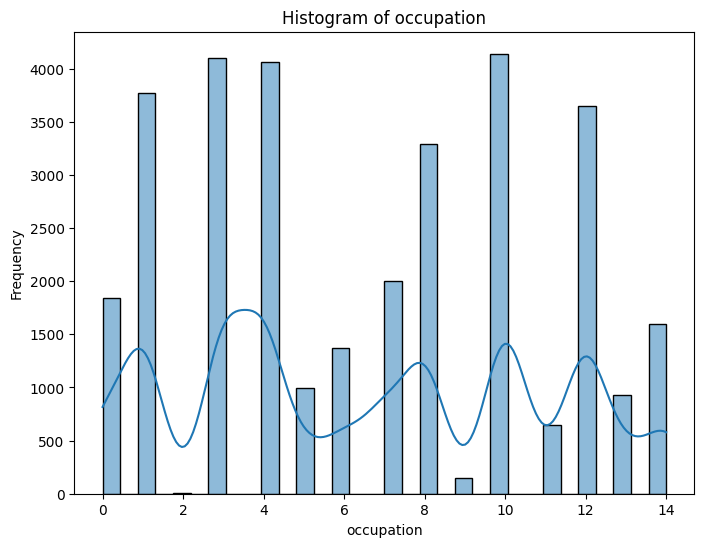

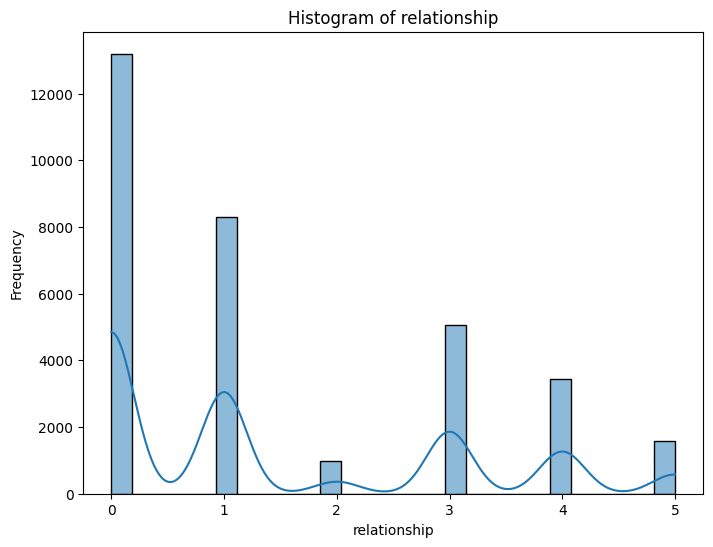

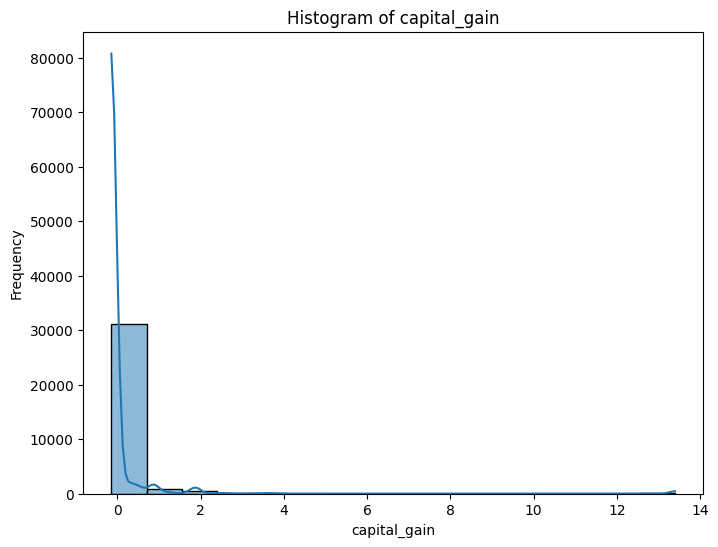

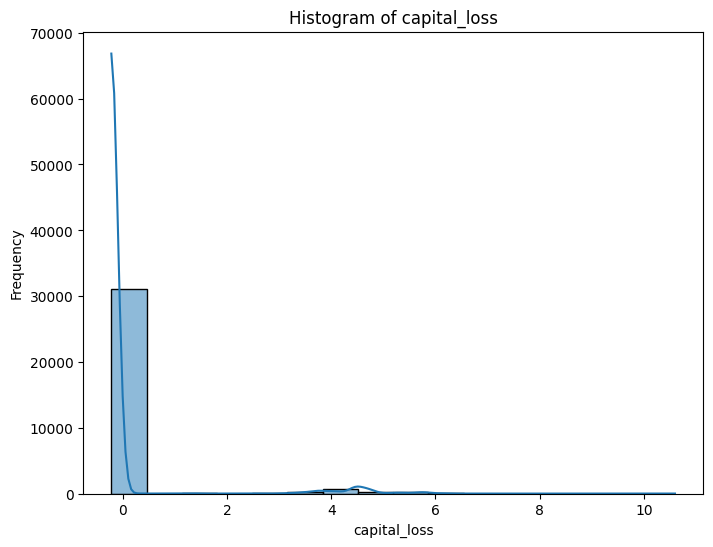

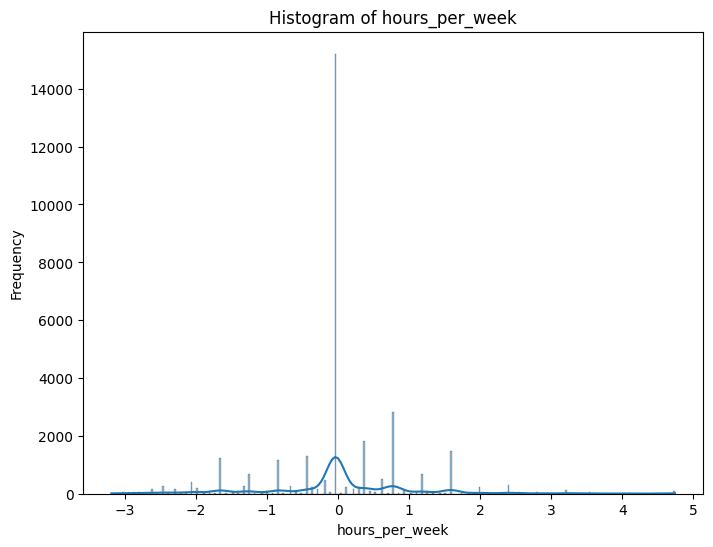

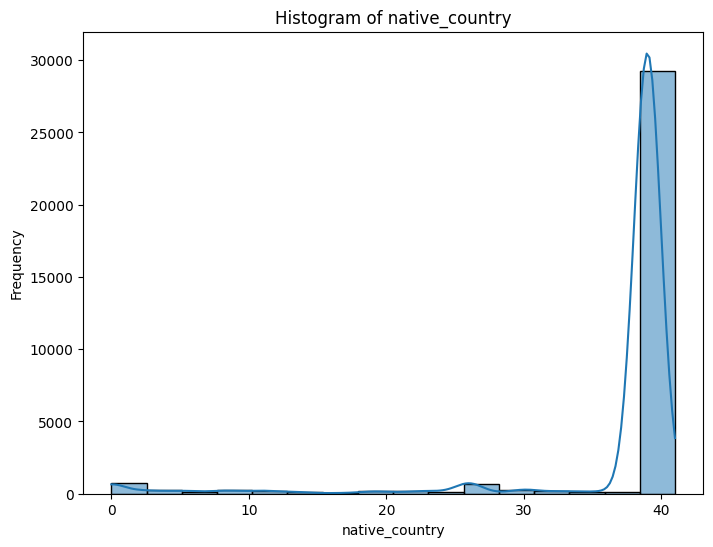

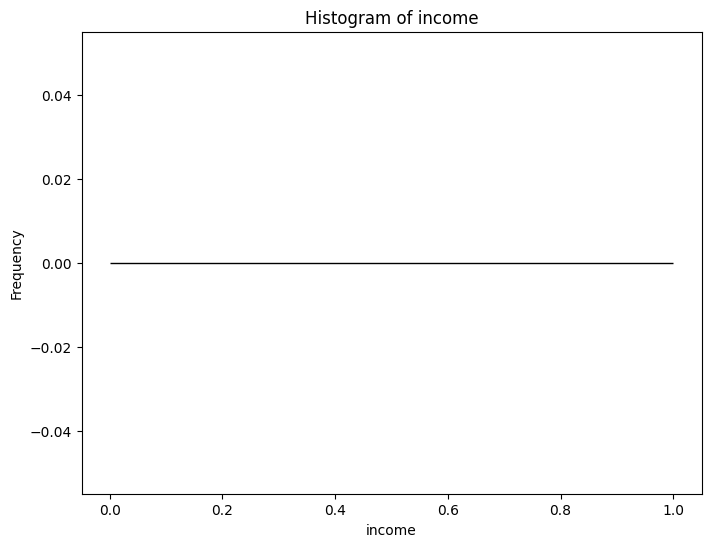

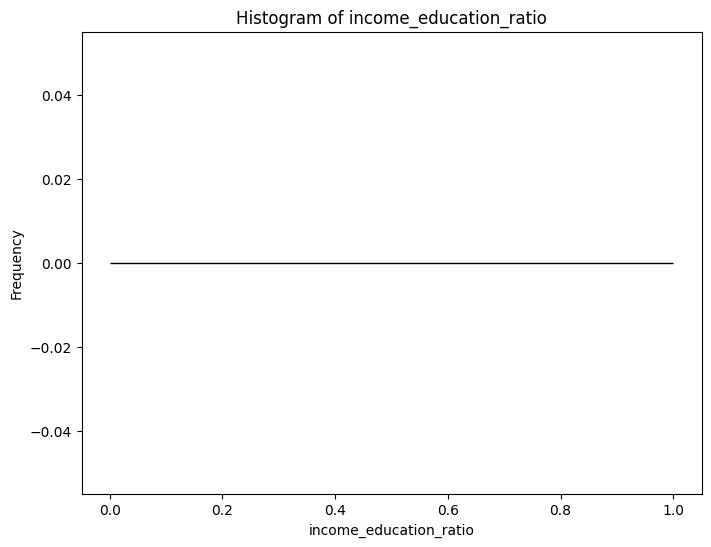

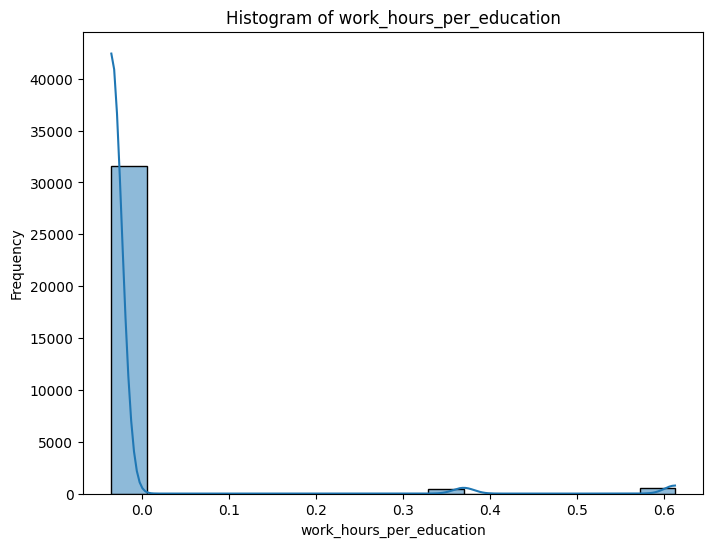

In [19]:
# Histogram to see the skewness of the data

for i in df.columns:
  if df[i].dtype in ["int64", "float64"]:
    plt.figure(figsize=(8,6))
    sns.histplot(df[i], kde=True)
    plt.title(f"Histogram of {i}")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


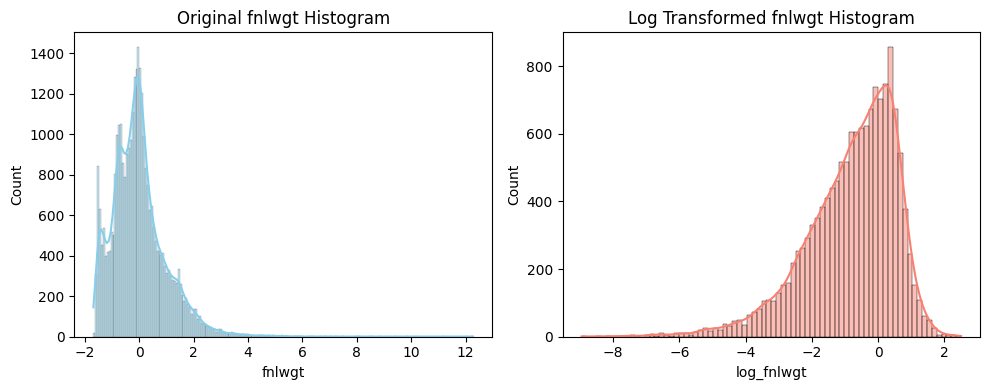

In [20]:
# Log transformation of fnlwgt column

df['log_fnlwgt'] = np.log(df['fnlwgt'])

plt.figure(figsize=(10, 4))

# Original 'fnlwgt' histogram
plt.subplot(1, 2, 1)
sns.histplot(df['fnlwgt'], kde=True, color='skyblue')
plt.title('Original fnlwgt Histogram')

# Transformed 'log_fnlwgt' histogram
plt.subplot(1, 2, 2)
sns.histplot(df['log_fnlwgt'], kde=True, color='salmon')
plt.title('Log Transformed fnlwgt Histogram')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


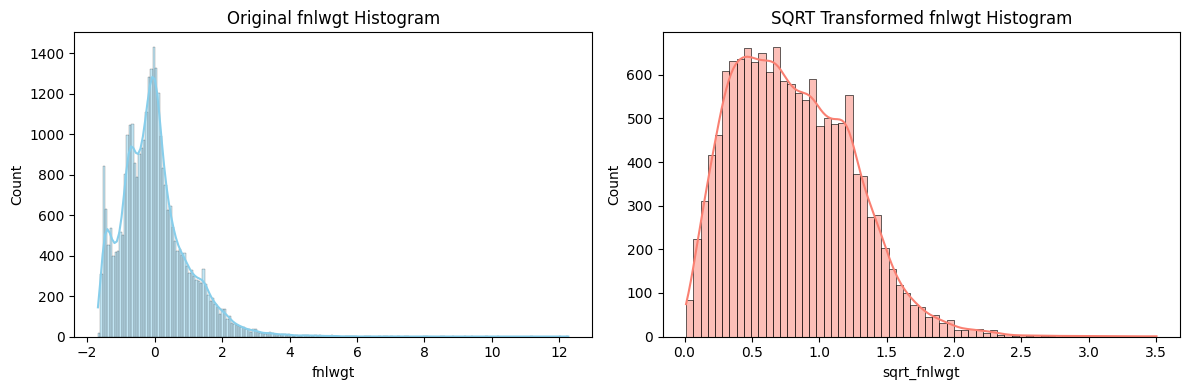

In [21]:
# Apply square root transformation to 'fnlwgt'
df['sqrt_fnlwgt'] = np.sqrt(df['fnlwgt'])

# Plot histograms to visualize the effect of the transformations
plt.figure(figsize=(12, 4))

# Original 'fnlwgt' histogram
plt.subplot(1, 2, 1)
sns.histplot(df['fnlwgt'], kde=True, color='skyblue')
plt.title('Original fnlwgt Histogram')

# Transformed 'sqrt_fnlwgt' histogram
plt.subplot(1, 2, 2)
sns.histplot(df['sqrt_fnlwgt'], kde=True, color='salmon')
plt.title('SQRT Transformed fnlwgt Histogram')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


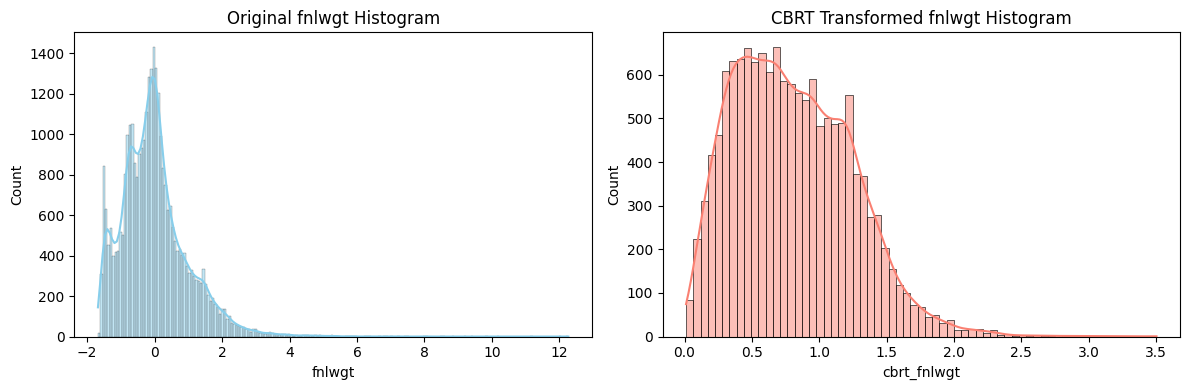

In [22]:
# Apply cube root transformation to 'fnlwgt'
df['cbrt_fnlwgt'] = np.sqrt(df['fnlwgt'])

# Plot histograms to visualize the effect of the transformations
plt.figure(figsize=(12, 4))

# Original 'fnlwgt' histogram
plt.subplot(1, 2, 1)
sns.histplot(df['fnlwgt'], kde=True, color='skyblue')
plt.title('Original fnlwgt Histogram')

# Transformed 'sqrt_fnlwgt' histogram
plt.subplot(1, 2, 2)
sns.histplot(df['cbrt_fnlwgt'], kde=True, color='salmon')
plt.title('CBRT Transformed fnlwgt Histogram')

plt.tight_layout()
plt.show()

Therefore, square root transformation and cube root transformation showed better results.

# **4. Feature Selection:**

In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
numeric_df = df.select_dtypes(include=['number'])

numeric_df_imputed = imputer.fit_transform(numeric_df)

clf = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict outliers
outlier_preds = clf.fit_predict(numeric_df_imputed)

# Filter out the outliers
df_clean = df[outlier_preds != -1]

# Display the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_clean.shape)


Original DataFrame shape: (32561, 20)
Cleaned DataFrame shape: (29305, 20)


Therefore, around 3000 rows of outliers were removed.

# **Discuss how outliers can affect model performance.**

1. Skewed Statistical Measures: Outliers can skew statistical measures such as mean, median, and standard deviation. Since these measures are often used in various machine learning algorithms, the presence of outliers can distort the understanding of the central tendency and spread of the data, leading to inaccurate model predictions.

2. Increased Variance: Outliers can increase the variance of model predictions. Models trained on datasets with outliers may produce highly variable predictions in response to small changes in the input data. This increased variance can make it difficult to trust the reliability of the model's predictions and may undermine its usefulness in practical applications.

3. Decreased Model Accuracy: Outliers can decrease the accuracy of predictive models by introducing noise and reducing the signal-to-noise ratio. Models trained on datasets containing outliers may capture patterns that are specific to those outliers rather than representing the underlying relationships in the majority of the data. This can lead to overfitting and poor generalization performance.

4. Model Bias: Outliers can bias the estimates of model parameters. Many machine learning algorithms, such as linear regression, are sensitive to outliers and may give disproportionate influence to these data points when fitting the model. As a result, the model may not generalize well to new data and exhibit poor performance on unseen samples.

In [24]:
#pip install ppscore

In [25]:
import ppscore as pps

# Print unique values of each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [ 0.03067056  0.83710898 -0.04264203  1.05704673 -0.77576787 -0.11595461
  0.7637964   0.98373415 -0.55583011  0.25060831 -0.6291427  -1.14233079
 -0.48251753  0.10398314 -0.33589236 -0.99570562  0.32392089  1.13035932
 -0.26257978  1.49692224  1.27698448 -1.43558112 -1.36226854  0.47054606
 -1.21564337  0.69048381 -1.28895595 -1.0690182   1.35029707  0.39723348
  0.17729573 -0.70245528 -1.5088937   0.61717123  0.54385864 -0.18926719
  2.96317391 -0.84908045  2.08342291 -0.40920495  2.74323616 -1.58220629
  1.2036719   1.6435474   2.30336066  1.86348516  2.37667324  2.15673549
  2.01011032  0.91042156  1.42360965 -0.92239303  1.57023482  3.76961234
  2.66992358  1.93679774  2.81654875  1.71685999  1.79017257  3.0364865
  2.44998583  2.59661099  2.23004807  2.52329841  3.10979908  2.88986133
  3.62298717  3.18311167  3.25642425  3.32973683  3.40304942  3.476362
  3.54967459]
Unique values in column 'workclass': [7 6 4 1 2 0 5 8 3]
Unique values in column '

In [26]:
# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Display the DataFrame after replacing non-numeric values with NaN
print("DataFrame after replacing non-numeric values with NaN:")
print(df_numeric.head())

DataFrame after replacing non-numeric values with NaN:
        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030671          7 -1.063611          9       1.134739               4   
1  0.837109          6 -1.008707          9       1.134739               2   
2 -0.042642          4  0.245079         11      -0.420060               0   
3  1.057047          4  0.425801          1      -1.197459               2   
4 -0.775768          4  1.408176          9       1.134739               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1   NaN  NaN      0.148453      -0.21666   
1           4             0   NaN  NaN     -0.145920      -0.21666   
2           6             1   NaN  NaN     -0.145920      -0.21666   
3           6             0   NaN  NaN     -0.145920      -0.21666   
4          10             5   NaN  NaN     -0.145920      -0.21666   

   hours_per_week  native_country  income  income_educa

In [27]:
# Remove rows containing non-numeric values
df_numeric = df.apply(pd.to_numeric, errors='coerce').dropna()

# Display the DataFrame after removing rows with non-numeric values
print("DataFrame after removing rows with non-numeric values:")
print(df_numeric.head())


DataFrame after removing rows with non-numeric values:
Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, income_education_ratio, work_hours_per_education, log_fnlwgt, sqrt_fnlwgt, cbrt_fnlwgt]
Index: []


In [28]:
pps_matrix = pps.matrix(df_numeric)

# Print the PPS matrix
print("PPS matrix:")
print(pps_matrix)

PPS matrix:
               x                         y  ppscore  \
0            age                       age        1   
1            age                 workclass        0   
2            age                    fnlwgt        0   
3            age                 education        0   
4            age             education_num        0   
..           ...                       ...      ...   
395  cbrt_fnlwgt    income_education_ratio        0   
396  cbrt_fnlwgt  work_hours_per_education        0   
397  cbrt_fnlwgt                log_fnlwgt        0   
398  cbrt_fnlwgt               sqrt_fnlwgt        0   
399  cbrt_fnlwgt               cbrt_fnlwgt        1   

                                  case  is_valid_score metric  baseline_score  \
0                       predict_itself            True   None               0   
1    empty_dataframe_after_dropping_na           False   None               0   
2    empty_dataframe_after_dropping_na           False   None               0   
3  

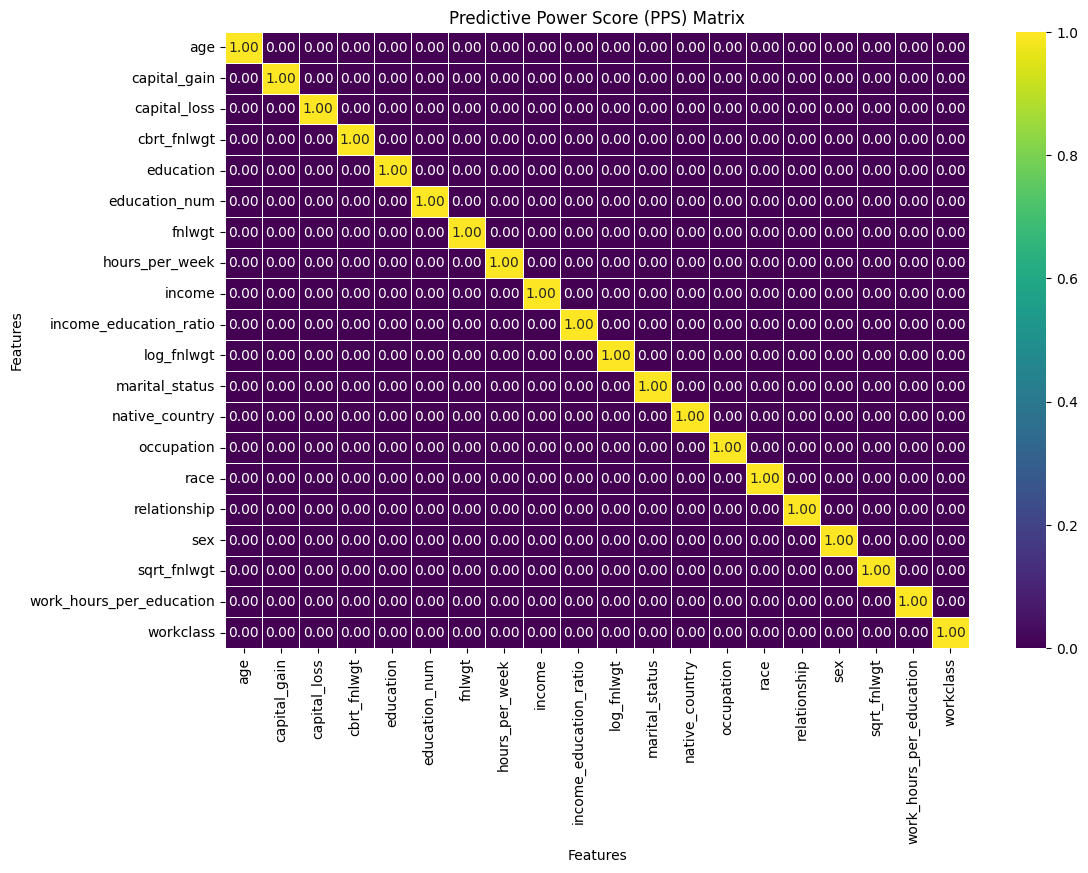

In [29]:
# Extract the relevant portion of the PPS matrix containing only the predictive power scores
pps_scores = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Plot the PPS matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pps_scores, cmap="viridis", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Predictive Power Score (PPS) Matrix")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


So, as we can see mostly zero values outside the diagonal suggest that there's little to no predictive power between different features. This could imply that the features are not strongly correlated or do not have significant influence on each other when predicting target variables.

True labels data type: int64
Predicted labels data type: int64


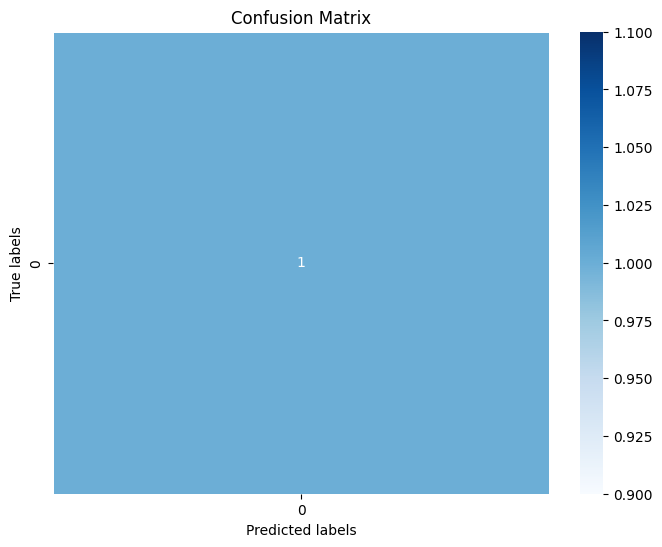

In [38]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

true_labels = np.asarray(true_labels)
predicted_labels = np.asarray(predicted_labels)

# Encode labels into integers
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(true_labels)
predicted_labels_encoded = label_encoder.transform(predicted_labels)

# Check label types
print("True labels data type:", true_labels_encoded.dtype)
print("Predicted labels data type:", predicted_labels_encoded.dtype)

# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predicted_labels_encoded)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

Uniform colors in the confusion matrix heatmap suggest that the classifier's predictions are evenly distributed across different classes.